In [60]:
import torch
import pyro
import pyro.distributions as dist
import pyro.distributions.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns
import os

import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [61]:
from data.gaussian import SyntheticDataset

In [62]:
dataset = SyntheticDataset()

In [63]:

loader = dataset.train_dataloader()

In [64]:
base_dist = dist.Normal(torch.zeros(2), torch.ones(2))
spline_transform = T.spline_coupling(2, count_bins=16)
flow_dist = dist.TransformedDistribution(base_dist, [spline_transform])


In [65]:
optimizer = torch.optim.Adam(spline_transform.parameters(), lr=5e-3)


In [66]:
for i in range(32):
    for batch in loader:
        
        (x,) = batch
        
        x = x[:, :, :2]
        optimizer.zero_grad()
        log_prob = flow_dist.log_prob(x.view(-1, 2)).view(x.shape[:-1])
        log_prob = torch.logsumexp(log_prob, dim=0)
        loss = -log_prob.mean()
        loss.backward()
        optimizer.step()
        
        
    print(loss)

tensor(1.4819, grad_fn=<NegBackward0>)
tensor(0.6548, grad_fn=<NegBackward0>)
tensor(0.0952, grad_fn=<NegBackward0>)
tensor(-0.4475, grad_fn=<NegBackward0>)
tensor(-0.4686, grad_fn=<NegBackward0>)
tensor(-0.6029, grad_fn=<NegBackward0>)
tensor(-0.5892, grad_fn=<NegBackward0>)
tensor(-0.8410, grad_fn=<NegBackward0>)
tensor(-0.8955, grad_fn=<NegBackward0>)
tensor(-1.0774, grad_fn=<NegBackward0>)
tensor(-0.9904, grad_fn=<NegBackward0>)
tensor(-0.9765, grad_fn=<NegBackward0>)
tensor(-0.8501, grad_fn=<NegBackward0>)
tensor(-0.9409, grad_fn=<NegBackward0>)
tensor(-1.2701, grad_fn=<NegBackward0>)
tensor(-0.9727, grad_fn=<NegBackward0>)
tensor(-1.1506, grad_fn=<NegBackward0>)
tensor(-0.9303, grad_fn=<NegBackward0>)
tensor(-1.1614, grad_fn=<NegBackward0>)
tensor(-1.2617, grad_fn=<NegBackward0>)
tensor(-1.1685, grad_fn=<NegBackward0>)
tensor(-1.0462, grad_fn=<NegBackward0>)
tensor(-1.1264, grad_fn=<NegBackward0>)
tensor(-1.2339, grad_fn=<NegBackward0>)
tensor(-1.2897, grad_fn=<NegBackward0>)
ten

In [99]:
rng1 = torch.linspace(-6, 6, 128)
rng2 = torch.linspace(-6, 0, 128)

X = torch.stack(torch.meshgrid(rng1, rng2, indexing='ij'), dim=0).view(2, -1).T

In [100]:
prob = flow_dist.log_prob(X).exp().view(128, 128)

Text(0, 0.5, 'negative')

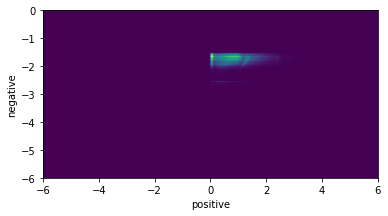

In [102]:
plt.imshow(prob.view(128, 128).detach(), origin='lower', extent=(rng1[0], rng1[-1], rng2[0], rng2[-1]))
plt.xlabel('positive')
plt.ylabel('negative')

In [91]:
x[:, :, 0].mean()

tensor(2.9901)

In [92]:
x[:, :, 1].mean()

tensor(-3.0204)

In [93]:
prob.shape

torch.Size([128, 128])

In [94]:
prob.shape

torch.Size([128, 128])

In [95]:
p_1 = prob.sum(dim=1)

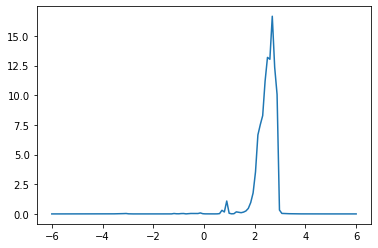

In [96]:
plt.plot(rng, p_1.detach())

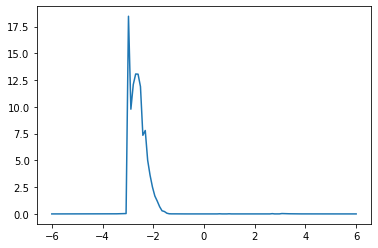

In [97]:
p_2 = prob.sum(dim=0)
plt.plot(rng, p_2.detach())


In [77]:
import seaborn as sns

/Users/druhe/Projects/gw/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

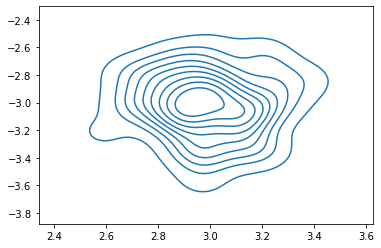

In [78]:
sns.kdeplot(x.mean(0)[:, 0], x.mean(0)[:, 1])

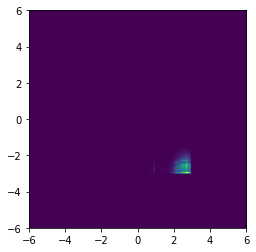

In [81]:
plt.imshow(prob.detach(), extent=(-6, 6, -6, 6), origin='lower')